In [48]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

In [49]:
# Load data
data = pd.read_csv("glass.csv")

In [64]:
# features and target
X = data.loc[:, data.columns != 'Type']
y = data['Type']

In [65]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
# Random Forest Classification
random_forest_classifier = RandomForestClassifier(n_estimators = 90, max_depth = 10, min_samples_split = 4)
random_forest_classifier = random_forest_classifier.fit(X_train, y_train)

In [83]:
# Logistic Regression 
logistic_regression_classifier = LogisticRegression(solver='liblinear', max_iter=10, random_state=10)
logistic_regression_classifier = logistic_regression_classifier.fit(X_train, y_train)

C:\Users\hedak\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [84]:
# Predict  on test set
y_pred_rf = random_forest_classifier.predict(X_test)
y_pred_lr = logistic_regression_classifier.predict(X_test)

In [85]:
# Evaluate
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy score Random Forest: {}".format(accuracy_score_rf))

accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy score Logistic Regression: {}".format(accuracy_score_lr))

Accuracy score Random Forest: 0.7887323943661971
Accuracy score Logistic Regression: 0.647887323943662


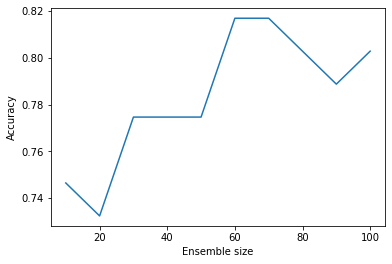

In [70]:
# Create plots based on ensemble size

ensemble_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

accuracies = []

for ensemble_size in ensemble_sizes:
    rf_classifier = RandomForestClassifier(n_estimators=ensemble_size)
    rf_classifier = rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.plot(ensemble_sizes, accuracies)
plt.xlabel("Ensemble size")
plt.ylabel("Accuracy")
plt.savefig("5_1_random_forest_ensemble_size.png")

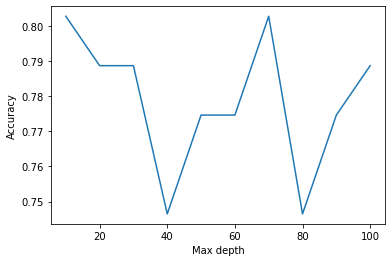

In [73]:
# Create plots based on max_depth

max_depths = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

accuracies = []

for max_depth in max_depths:
    rf_classifier = RandomForestClassifier(max_depth=max_depth)
    rf_classifier = rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.plot(max_depths, accuracies)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.savefig("5_2_random_forest_max_depths.png")

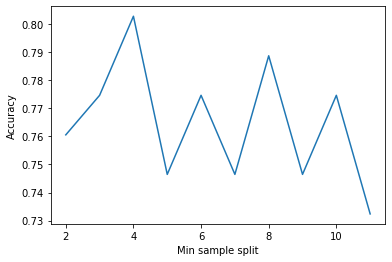

In [75]:
# Create plots based on min_sample_split

min_splits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

accuracies = []

for split in min_splits:
    rf_classifier = RandomForestClassifier(min_samples_split=split)
    rf_classifier = rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.plot(min_splits, accuracies)
plt.xlabel("Min sample split")
plt.ylabel("Accuracy")
plt.savefig("5_3_random_forest_min_sample_split.png")

C:\Users\hedak\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hedak\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hedak\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hedak\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hedak\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

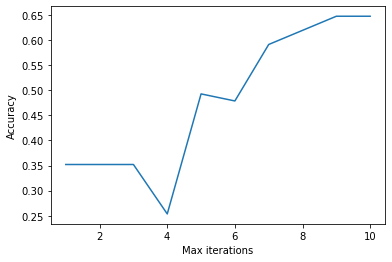

In [76]:
# Create plots based on max_iter

max_iterations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracies = []

for max_it in max_iterations:
    lr_classifier = LogisticRegression(solver='liblinear', max_iter=max_it)
    lr_classifier = lr_classifier.fit(X_train, y_train)

    y_pred = lr_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.plot(max_iterations, accuracies)
plt.xlabel("Max iterations")
plt.ylabel("Accuracy")
plt.savefig("5_4_logistic_regression_max_iterations.png")

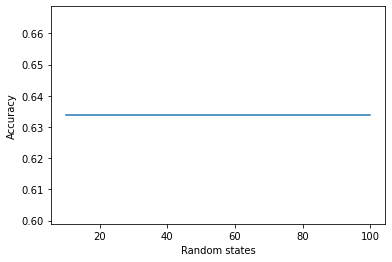

In [77]:
# Create plots based on random_state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

accuracies = []

for state in random_states:
    lr_classifier = LogisticRegression(solver='liblinear', random_state=state)
    lr_classifier = lr_classifier.fit(X_train, y_train)

    y_pred = lr_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.plot(random_states, accuracies)
plt.xlabel("Random states")
plt.ylabel("Accuracy")
plt.savefig("5_5_logistic_regression_random_states.png")